<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

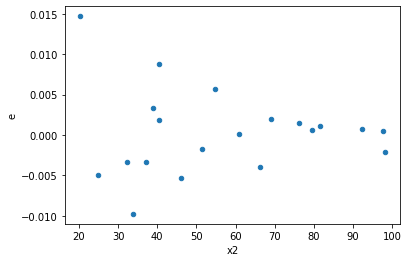

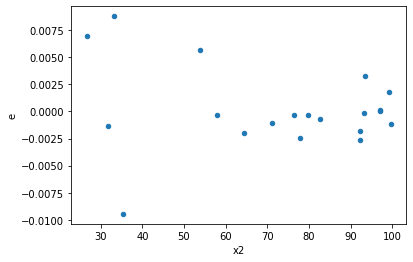

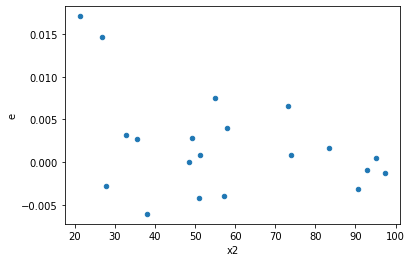

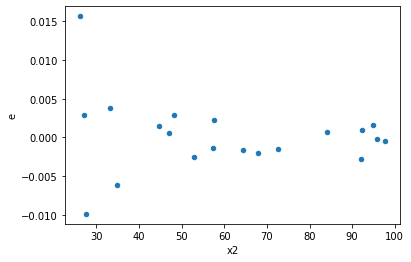

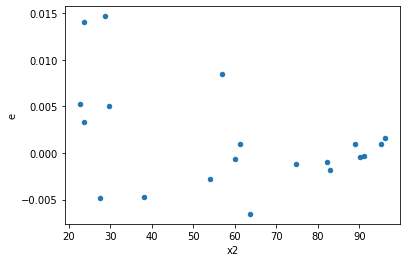

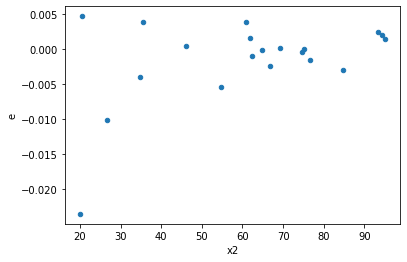

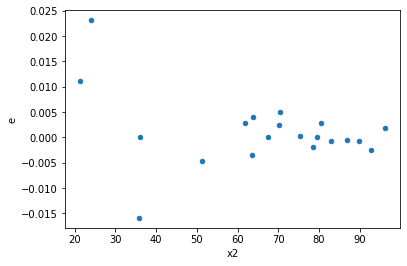

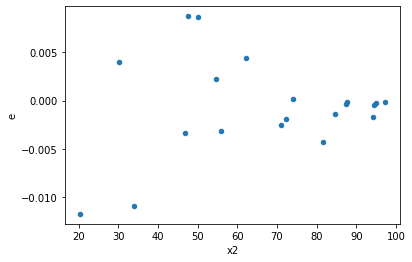

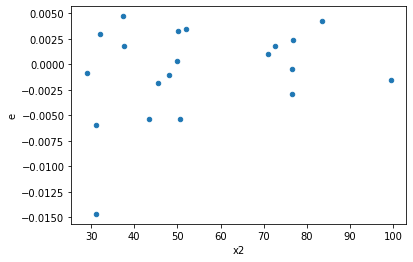

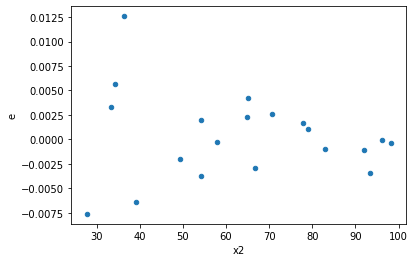

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,6.0,6.0,3.012344483404753e-05,4.341288919076033e-05,5.020574139007922e-06,7.235481531793389e-06,1.4411661557941138,0.6684565434069643,0.6657717282965179,0.3342282717034821,Reject005=1 : Homoscedasticity
26.0,6.0,6.0,2.01873565704034e-05,2.7062883456000046e-05,3.3645594284005667e-06,4.510480576000008e-06,1.340585794956276,0.730989928659808,0.634505035670096,0.365494964329904,Reject005=1 : Homoscedasticity
182.0,6.0,6.0,4.2770558042642395e-05,4.5733616412745897e-05,7.128426340440399e-06,7.622269402124316e-06,1.0692779918173927,0.9372731919999331,0.5313634040000335,0.46863659599996654,Reject005=1 : Homoscedasticity
237.0,6.0,6.0,1.4724570202125657e-05,1.6187747814370238e-05,2.4540950336876095e-06,2.6979579690617065e-06,1.099369801098395,0.911382799052936,0.544308600473532,0.455691399526468,Reject005=1 : Homoscedasticity
243.0,6.0,6.0,4.029094767820308e-05,5.0119100166225546e-05,6.71515794636718e-06,8.35318336103759e-06,1.2439295438399276,0.7977755142432983,0.6011122428783509,0.39888775712164914,Reject005=1 : Homoscedasticity
273.0,6.0,6.0,1.388711704853983e-05,1.562941413381807e-05,2.314519508089972e-06,2.6049023556363454e-06,1.125461395564563,0.8895796182744085,0.5552101908627958,0.44478980913720423,Reject005=1 : Homoscedasticity
567.0,6.0,6.0,1.4855202540246576e-05,2.732709436815067e-05,2.475867090041096e-06,4.554515728025112e-06,1.839563903226127,0.4770864817135396,0.7614567591432302,0.2385432408567698,Reject005=1 : Homoscedasticity
601.0,6.0,6.0,1.0629591688793177e-05,3.2465898429980383e-05,1.7715986147988628e-06,5.4109830716633975e-06,3.0542940293943106,0.20003234312341256,0.8999838284382937,0.10001617156170628,Reject005=1 : Homoscedasticity
602.0,6.0,6.0,5.8626214606085016e-05,6.269119444298729e-05,9.771035767680837e-06,1.044853240716455e-05,1.0693372387116455,0.9372214227558899,0.531389288622055,0.46861071137794497,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.0002580536624270032,1.3794853621392122e-05,4.3008943737833865e-05,2.2991422702320205e-06,0.05345730609537207,0.0024184830519813788,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,8.486521712560614e-05,2.8139657953029763e-05,1.414420285426769e-05,4.689942992171627e-06,0.3315805804323956,0.2049543146762669,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,0.00014193588789665585,1.3990104332646895e-05,2.3655981316109308e-05,2.331684055441149e-06,0.09856636358827833,0.01257127571089241,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,0.0001245573191023988,4.0644557230825805e-05,2.0759553183733134e-05,6.774092871804301e-06,0.3263120748240562,0.19874508411483435,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,3.012344483404753e-05,4.341288919076033e-05,5.020574139007922e-06,7.235481531793389e-06,1.4411661557941138,0.6684565434069643,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.0002897420201279481,1.85674928569401e-05,4.829033668799135e-05,3.09458214282335e-06,0.06408284462412743,0.003983346064332091,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,0.00032250144509422606,2.8792248718091524e-05,5.375024084903768e-05,4.798708119681921e-06,0.08927789055233293,0.009702100384828187,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,0.0004897010615528432,8.677684291982641e-06,8.161684359214053e-05,1.44628071533044e-06,0.017720370596023795,0.00010283727492976831,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,0.0002906855076181476,7.4153407474157344e-06,4.84475846030246e-05,1.235890124569289e-06,0.025509839854681464,0.00029647378629418716,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    775
Reject005=1 : Homoscedasticity      225
Name: Result_test, dtype: int64